In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import pandas as pd
from matplotlib import cm


root = '/usr/local/serenceslab/maggie/shapeDim/'

sys.path.append(os.path.join(root, 'Analysis'))
from code_utils import plot_utils, data_utils
from code_utils import file_utils, grid_utils, stats_utils

In [2]:
from analyze_behav import process_behav
sublist = [1,2,3,4,5,6,7]
# process_behav.preproc_main_task(sublist)
# process_behav.preproc_repeat_task(sublist)

In [3]:
all_grid_points = grid_utils.get_full_grid()
n_pts_all_grid = all_grid_points.shape[0]

grid_pts = grid_utils.get_main_grid()

#### loading data for the main task first (categorization)

In [4]:
subjects = np.arange(1,8)
n_subj = len(subjects)

task_names = ['Linear-1','Linear-2','Checker','One-Back'];
n_tasks = len(task_names)-1
acc_by_task = np.zeros((n_subj, n_tasks));
acc_by_task_easy = np.zeros((n_subj, n_tasks));
acc_by_task_hard = np.zeros((n_subj, n_tasks));

rt_by_task = np.zeros((n_subj, n_tasks));
rt_by_task_easy = np.zeros((n_subj, n_tasks));
rt_by_task_hard = np.zeros((n_subj, n_tasks));


for si, ss in enumerate(subjects):
    
    bdat = data_utils.load_main_task_labels(ss)
    
    resp = np.array(bdat['resp'])
    correct_resp = np.array(bdat['correct_resp'])
    rt = np.array(bdat['rt'])
    
    for ti in range(n_tasks):
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False)
        acc_by_task[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task[si,ti] = np.mean(rt[inds])
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) & (bdat['is_main_grid']==1)
        acc_by_task_easy[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task_easy[si,ti] = np.mean(rt[inds])
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) & (bdat['is_main_grid']==0)
        acc_by_task_hard[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task_hard[si,ti] = np.mean(rt[inds])
        

#### load data for repeat-detection (one-back) task

In [5]:
acc_repeat_task = np.full(fill_value=np.nan, shape=(n_subj,1));
acc_repeat_task_easy = np.full(fill_value=np.nan, shape=(n_subj,1));
acc_repeat_task_hard = np.full(fill_value=np.nan, shape=(n_subj,1));

rt_repeat_task = np.full(fill_value=np.nan, shape=(n_subj,1));
rt_repeat_task_easy = np.full(fill_value=np.nan, shape=(n_subj,1));
rt_repeat_task_hard = np.full(fill_value=np.nan, shape=(n_subj,1));

for si, ss in enumerate(subjects):
    
    bdat = data_utils.load_repeat_task_labels(ss)
    
    resp = np.array(bdat['resp'])
    correct_resp = np.array(bdat['correct_resp'])
    rt = np.array(bdat['rt'])
    
    inds = (bdat['timeout']==False)
    acc_repeat_task[si] = np.mean(correct_resp[inds]==resp[inds])
    rt_repeat_task[si] = np.mean(rt[inds])
    
    inds = (bdat['timeout']==False) & (bdat['is_main_grid']==1)
    acc_repeat_task_easy[si] = np.mean(correct_resp[inds]==resp[inds])
    rt_repeat_task_easy[si] = np.mean(rt[inds])
    
    inds = (bdat['timeout']==False) & (bdat['is_main_grid']==0)
    acc_repeat_task_hard[si] = np.mean(correct_resp[inds]==resp[inds])
    rt_repeat_task_hard[si] = np.mean(rt[inds])
    

#### concatenate to make 4 total tasks

In [6]:
acc_by_task_all = np.concatenate([acc_by_task, acc_repeat_task], axis=1) 
rt_by_task_all = np.concatenate([rt_by_task, rt_repeat_task], axis=1) 

acc_by_task_easy_all = np.concatenate([acc_by_task_easy, acc_repeat_task_easy], axis=1) 
rt_by_task_easy_all = np.concatenate([rt_by_task_easy, rt_repeat_task_easy], axis=1) 

acc_by_task_hard_all = np.concatenate([acc_by_task_hard, acc_repeat_task_hard], axis=1) 
rt_by_task_hard_all = np.concatenate([rt_by_task_hard, rt_repeat_task_hard], axis=1) 

In [7]:
subcolors = cm.BuGn(np.linspace(0,1,n_subj+1))[1:]
# subcolors = cm.Blues(np.linspace(0,1,n_subj))
plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)


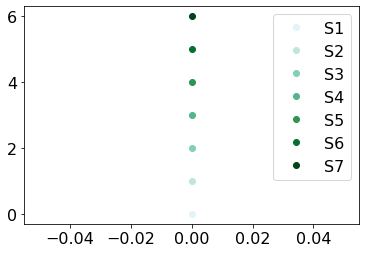

In [8]:
plt.figure()
for si in range(n_subj):
    plt.plot(0,si,'o', color=subcolors[si,:])
plt.legend(['S%0d'%ss for ss in subjects])
figfolder = os.path.join(root, 'Analysis','figures')
figname = os.path.join(figfolder, 'behav_legend.pdf')
plt.savefig(figname)

In [9]:
np.random.seed(343545)
jitters = np.linspace(-0.05, 0.05, n_subj)
jitters = jitters[np.random.permutation(len(jitters))]

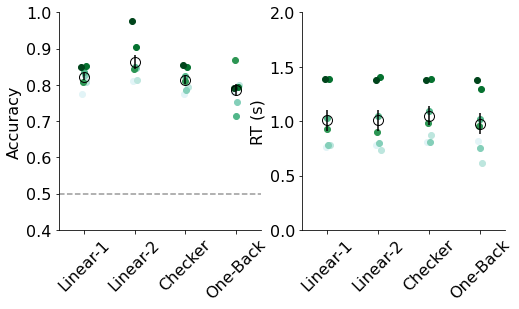

In [10]:
plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)

plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)

vals = acc_by_task_all
n_tasks = vals.shape[1]
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subj)
# plt.bar(np.arange(n_tasks), meanvals, color=[0.6, 0.6, 0.6])
plt.plot(np.arange(n_tasks), meanvals, 'o', color='k', zorder=10, markersize=10, markerfacecolor='none')
plt.errorbar(np.arange(n_tasks), meanvals, semvals, linestyle='none', color='k', zorder=10)
for si in range(n_subj):
    for ti in range(vals.shape[1]):
        plt.plot(ti+jitters[si], vals[si,ti], 'o', color=subcolors[si,:], markersize=6, zorder=-10)
plt.xticks(np.arange(n_tasks), task_names, rotation=45)
plt.ylabel('Accuracy')
plt.ylim([0.4, 1.0])
plt.xlim([-0.5, 3.5])
plt.axhline(0.5, color=[0.6, 0.6, 0.6], linestyle='--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax = plt.subplot(1,2,2)

vals = rt_by_task_all
n_tasks = vals.shape[1]
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subj)

plt.plot(np.arange(n_tasks), meanvals, 'o', color='k', zorder=10, markersize=10, markerfacecolor='none')
plt.errorbar(np.arange(n_tasks), meanvals, semvals, linestyle='none', color='k', zorder=10)
for si in range(n_subj):
    for ti in range(vals.shape[1]):
        plt.plot(ti+jitters[si], vals[si,ti], 'o', color=subcolors[si,:], markersize=6, zorder=-10)
        
plt.xticks(np.arange(n_tasks), task_names, rotation=45)
plt.ylabel('RT (s)')
plt.ylim([0, 2.0])
plt.xlim([-0.5, 3.5])
# plt.title('response time');

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

figfolder = os.path.join(root, 'Analysis','figures')
figname = os.path.join(figfolder, 'behav_4tasks.pdf')
plt.savefig(figname)

In [11]:
pd.DataFrame({'mean acc': np.mean(acc_by_task_all, axis=0), \
              'sem acc': np.std(acc_by_task_all, axis=0)/np.sqrt(n_subj), \
              'mean RT': np.mean(rt_by_task_all, axis=0), \
              'sem RT': np.std(rt_by_task_all, axis=0)/np.sqrt(n_subj), }, \
             index = task_names).round(2)
              

,mean acc,sem acc,mean RT,sem RT
Linear-1,0.82,0.01,1.01,0.10
Linear-2,0.86,0.02,1.01,0.10
Checker,0.81,0.01,1.05,0.09
One-Back,0.79,0.02,0.98,0.10


In [12]:
vals = acc_by_task_all
stats_utils.rmanova_1way(vals,'task',do_shuffle=True,n_iter=10000,rndseed=243545)

,F Value,Num DF,Den DF,Pr > F,p (permutation)
task,5.542762,3.0,18.0,0.007116,0.002


In [13]:
vals = acc_by_task_all

pvals = np.zeros((6,))
tstats = np.zeros((6,))

pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

pair_names = ['%s vs %s'%(task_names[pair[0]], task_names[pair[1]]) for pair in pairs]

for pi, pair in enumerate(pairs):
    
    avals = vals[:,pair]
    
    p,t = stats_utils.paired_ttest_nonpar(avals[:,0], avals[:,1], n_iter=10000, rndseed=343455+pi)
    
    pvals[pi] = p
    tstats[pi] = t
    

pd.DataFrame({'t': tstats.round(2), 'p': pvals}, index=pair_names)

,t,p
Linear-1 vs Linear-2,-2.65,0.0160
Linear-1 vs Checker,1.44,0.1942
Linear-1 vs One-Back,1.58,0.1942
Linear-2 vs Checker,3.94,0.0166
Linear-2 vs One-Back,2.73,0.0462
Checker vs One-Back,1.27,0.3160


In [14]:
vals = rt_by_task_all
stats_utils.rmanova_1way(vals,'task',do_shuffle=True,n_iter=10000,rndseed=345456)

,F Value,Num DF,Den DF,Pr > F,p (permutation)
task,3.380784,3.0,18.0,0.041036,0.0181


In [15]:
vals = rt_by_task_all

pvals = np.zeros((6,))
tstats = np.zeros((6,))

pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

pair_names = ['%s vs %s'%(task_names[pair[0]], task_names[pair[1]]) for pair in pairs]

for pi, pair in enumerate(pairs):
    
    avals = vals[:,pair]
    
    p,t = stats_utils.paired_ttest_nonpar(avals[:,0], avals[:,1], n_iter=10000, rndseed=343455+pi)
    
    pvals[pi] = p
    tstats[pi] = t
    

pd.DataFrame({'t': tstats.round(2), 'p': pvals}, index=pair_names)

,t,p
Linear-1 vs Linear-2,0.34,0.7918
Linear-1 vs Checker,-3.15,0.0498
Linear-1 vs One-Back,1.21,0.3038
Linear-2 vs Checker,-2.17,0.0632
Linear-2 vs One-Back,1.20,0.3052
Checker vs One-Back,2.17,0.0482


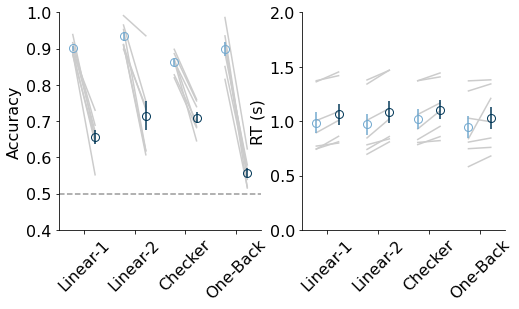

In [16]:
plt.figure(figsize=(8,4))
jitters =np.linspace(-0.22, 0.22, 2)



ax = plt.subplot(1,2,1)
colors = cm.PuBu(np.linspace(0,1,5))[[2,4],:]


vals = np.concatenate([acc_by_task_easy_all[:,:,None], \
                       acc_by_task_hard_all[:,:,None]], axis=2)

n_tasks = vals.shape[1]

meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subj)


for ji in range(2):
    
    plt.plot(np.arange(n_tasks)+jitters[ji], meanvals[:,ji], 'o', color=colors[ji,:],markersize=8, markerfacecolor='none')
    plt.errorbar(np.arange(n_tasks)+jitters[ji], meanvals[:,ji], semvals[:,ji], \
                 linestyle='none', color=colors[ji,:])

for ti in range(4):
    
    # plt.plot(ti+jitters, vals[:,ti,:].T, '.', color=[0.8, 0.8, 0.8], zorder=-10)
    plt.plot(ti+jitters, vals[:,ti,:].T, '-', color=[0.8, 0.8, 0.8], zorder=-10)
    
plt.ylim([0.4,1.0])
plt.xlim([-0.5, 3.5])
# plt.title('response time');

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(np.arange(n_tasks), task_names, rotation=45)
plt.ylabel('Accuracy')

plt.axhline(0.5, color=[0.6, 0.6, 0.6], linestyle='--')




ax = plt.subplot(1,2,2)

vals = np.concatenate([rt_by_task_easy_all[:,:,None], \
                       rt_by_task_hard_all[:,:,None]], axis=2)

n_tasks = vals.shape[1]

meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subj)

for ji in range(2):
    
    plt.plot(np.arange(n_tasks)+jitters[ji], meanvals[:,ji], 'o', color=colors[ji,:],markersize=8, markerfacecolor='none')
    plt.errorbar(np.arange(n_tasks)+jitters[ji], meanvals[:,ji], semvals[:,ji], \
                 linestyle='none', color=colors[ji,:])

for ti in range(4):
    
    # plt.plot(ti+jitters, vals[:,ti,:].T, '.', color=[0.8, 0.8, 0.8], zorder=-10)
    plt.plot(ti+jitters, vals[:,ti,:].T, '-', color=[0.8, 0.8, 0.8], zorder=-10)
    
plt.ylim([0, 2.0])
plt.xlim([-0.5, 3.5])
# plt.title('response time');

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(np.arange(n_tasks), task_names, rotation=45)
plt.ylabel('RT (s)')

# plt.axhline(0.5, color=[0.6, 0.6, 0.6], linestyle='--')

figfolder = os.path.join(root, 'Analysis','figures')
figname = os.path.join(figfolder, 'behav_easyhard.pdf')
plt.savefig(figname)

#### easy versus hard within task

In [17]:
pvals = np.zeros((n_tasks,))
tstats = np.zeros((n_tasks,))

for ti in range(n_tasks):
    
    vals1 = acc_by_task_easy_all[:,ti]
    vals2 = acc_by_task_hard_all[:,ti]
    
    # print(vals1, vals2)
    p,t = stats_utils.paired_ttest_nonpar(vals1, vals2, n_iter=10000, rndseed=867887+ti)
    
    # print(p, t)
    pvals[ti] = p
    tstats[ti] = t

pd.DataFrame({'t': tstats.round(2), 'p': pvals}, index=task_names)

,t,p
Linear-1,11.88,0.0178
Linear-2,5.87,0.0174
Checker,11.10,0.0156
One-Back,19.51,0.0166


In [18]:
pvals = np.zeros((n_tasks,))
tstats = np.zeros((n_tasks,))

for ti in range(n_tasks):
    
    vals1 = rt_by_task_easy_all[:,ti]
    vals2 = rt_by_task_hard_all[:,ti]
    
    # print(vals1, vals2)
    p,t = stats_utils.paired_ttest_nonpar(vals1, vals2, n_iter=10000, rndseed=234344+ti)
    
    # print(p, t)
    pvals[ti] = p
    tstats[ti] = t

pd.DataFrame({'t': tstats.round(2), 'p': pvals}, index=task_names)

,t,p
Linear-1,-6.15,0.0186
Linear-2,-8.08,0.0154
Checker,-4.35,0.0170
One-Back,-1.57,0.0792


#### two-way RM anova for task x difficulty

In [19]:
vals = np.concatenate([acc_by_task_easy_all[:,:,None], \
                       acc_by_task_hard_all[:,:,None]], axis=2)

stats_utils.rmanova_2way(vals,['task','difficulty'], do_shuffle=True, n_iter=10000, rndseed=234345)

,F Value,Num DF,Den DF,Pr > F,p (permutation)
task,6.900928,3.0,18.0,0.002734,0.0022
difficulty,180.393300,1.0,6.0,0.000011,0.0000
task:difficulty,17.840298,3.0,18.0,0.000013,0.0000


In [20]:
vals = np.concatenate([rt_by_task_easy_all[:,:,None], \
                       rt_by_task_hard_all[:,:,None]], axis=2)

stats_utils.rmanova_2way(vals,['task','difficulty'],  do_shuffle=True, n_iter=10000, rndseed=867667)

,F Value,Num DF,Den DF,Pr > F,p (permutation)
task,2.877620,3.0,18.0,0.064714,0.0553
difficulty,16.656107,1.0,6.0,0.006493,0.0026
task:difficulty,0.538232,3.0,18.0,0.662111,0.6786
